In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image3"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'

In [2]:
def create_dir(file_path):
    if os.path.exists(file_path):
        return
    os.makedirs(file_path)

count = 0

def savefig():
    global count
    count += 1
    PIC_NAME = PIC_PATH + f'/figure{count}.png'
    plt.savefig(PIC_NAME)

In [3]:
create_dir(PIC_PATH)

data = pd.read_excel(RESULT_PATH + '/result1_2.xlsx', index_col=0)
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,0,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,8,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,8,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,1,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,2,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37,8,113899.92,1,0,0,80215.20,0
9296,15815645,481,0,37,8,152303.66,2,1,1,175082.20,0
9297,15815656,541,1,39,9,100116.67,1,1,1,199808.10,1
9298,15815660,758,1,34,1,154139.45,1,1,1,60728.89,0


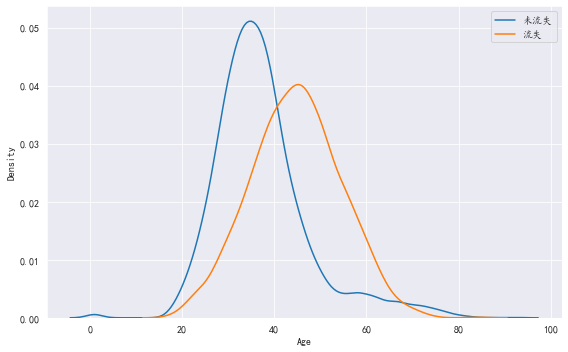

In [4]:
plt.figure(figsize=(8, 5))
sns.distplot(data[data['Exited']==0]['Age'], kde=True, hist=False, label='未流失')
sns.distplot(data[data['Exited']==1]['Age'], kde=True, hist=False, label='流失')
plt.legend()
plt.tight_layout()
savefig()

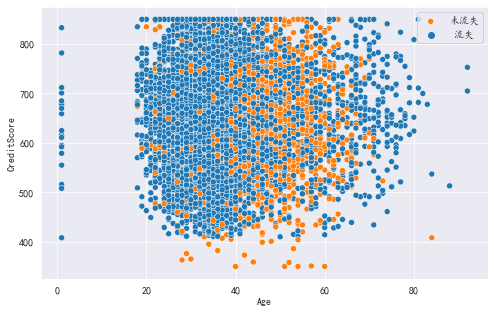

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='CreditScore', data=data, hue='Exited')
plt.legend(['未流失', ' 流失'], loc=1)
savefig()

<Figure size 720x360 with 0 Axes>

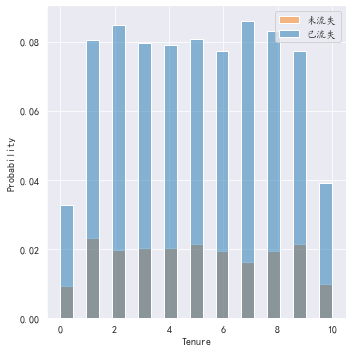

In [6]:
plt.figure(figsize=(10, 5))
sns.displot(x='Tenure', hue='Exited', stat='probability', data=data, legend=False)
plt.legend(['未流失', '已流失'], loc=1)
savefig()

In [7]:
exist = data[data['Exited'] == 0]['Tenure'].value_counts()
non_exist = data[data['Exited'] == 1]['Tenure'].value_counts()

exist = exist / (exist.sum() + non_exist.sum())
non_exist = non_exist / (non_exist.sum() + exist.sum())

exist

7     0.085888
2     0.084692
8     0.083170
5     0.080778
1     0.080561
3     0.079474
4     0.079148
9     0.077408
6     0.077408
10    0.039139
0     0.032616
Name: Tenure, dtype: float64

In [8]:
result = pd.concat([exist, non_exist], axis=1).T
result

,7,2,8,5,1,3,4,9,6,10,0
Tenure,0.085888,0.084692,0.083170,0.080778,0.080561,0.079474,0.079148,0.077408,0.077408,0.039139,0.032616
Tenure,0.081075,0.097943,0.096855,0.106649,0.115355,0.101752,0.101208,0.107193,0.096855,0.048427,0.046251


In [9]:
data['Tenure'].max()

10

In [10]:
bin_tenure = [0, 3, 6, 11]
labels = ['新客户', '稳定客户', '老客户']
box1 = pd.cut(data['Tenure'], bins=bin_tenure, labels=labels, include_lowest=True, right=True)
data['Tenure'] = box1
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,新客户,185891.54,1,1,1,46369.57,1
1,15553256,619,1,41,老客户,0.00,3,1,1,79866.73,1
2,15553283,603,1,42,老客户,91611.12,1,0,0,144675.30,1
3,15553308,589,1,61,新客户,0.00,1,1,0,61108.56,1
4,15553387,687,1,39,新客户,0.00,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37,老客户,113899.92,1,0,0,80215.20,0
9296,15815645,481,0,37,老客户,152303.66,2,1,1,175082.20,0
9297,15815656,541,1,39,老客户,100116.67,1,1,1,199808.10,1
9298,15815660,758,1,34,新客户,154139.45,1,1,1,60728.89,0


In [11]:
data['Balance'].max()

250898.09

In [12]:
bin_balance = [0, 50000, 90000, 120000, 260000]
labels = ['低资产', '中下资产', '中上资产', '高资产']
box2 = pd.cut(data['Balance'], bins=bin_balance, labels=labels, include_lowest=True, right=True)
data['Balance'] = box2
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
1,15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
2,15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
3,15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
4,15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0
9296,15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0
9297,15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1
9298,15815660,758,1,34,新客户,高资产,1,1,1,60728.89,0


In [13]:
MAP = {
    'feature_name': {
        'Tenure': 'Status',
        'Balance': 'AssetStage'
    }
}

data.rename(columns=MAP['feature_name'], inplace=True)
data

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
1,15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
2,15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
3,15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
4,15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9295,15815628,711,1,37,老客户,中上资产,1,0,0,80215.20,0
9296,15815645,481,0,37,老客户,高资产,2,1,1,175082.20,0
9297,15815656,541,1,39,老客户,中上资产,1,1,1,199808.10,1
9298,15815660,758,1,34,新客户,高资产,1,1,1,60728.89,0


In [14]:
data.to_excel(RESULT_PATH + '/result3.xlsx', index=False)

In [15]:
not_exist = data[data['Exited'] == 1]
not_exist

,CustomerId,CreditScore,Gender,Age,Status,AssetStage,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15553251,713,1,52,新客户,高资产,1,1,1,46369.57,1
1,15553256,619,1,41,老客户,低资产,3,1,1,79866.73,1
2,15553283,603,1,42,老客户,中上资产,1,0,0,144675.30,1
3,15553308,589,1,61,新客户,低资产,1,1,0,61108.56,1
4,15553387,687,1,39,新客户,低资产,3,0,0,188150.60,1
...,...,...,...,...,...,...,...,...,...,...,...
9282,15815271,755,0,43,稳定客户,高资产,3,1,0,16929.41,1
9284,15815316,644,0,50,老客户,中下资产,4,1,0,196371.13,1
9288,15815490,670,0,40,新客户,高资产,3,0,0,177028.00,1
9294,15815626,640,0,63,新客户,中下资产,2,1,1,112503.24,1


In [16]:
value_count = not_exist[['Status',  'AssetStage']].value_counts()
value_count

Status  AssetStage
新客户     高资产           246
老客户     高资产           243
稳定客户    高资产           206
新客户     中上资产          181
        低资产           180
老客户     中上资产          175
稳定客户    低资产           152
        中上资产          151
老客户     低资产           142
新客户     中下资产           57
老客户     中下资产           53
稳定客户    中下资产           51
dtype: int64

In [17]:
res34 = pd.DataFrame(index=['新客户', '稳定客户', '老客户'], columns=labels)
res34

,低资产,中下资产,中上资产,高资产
新客户,NaN,NaN,NaN,NaN
稳定客户,NaN,NaN,NaN,NaN
老客户,NaN,NaN,NaN,NaN


In [18]:
for idx in res34.index:
    for col in res34.columns:
        res34.loc[idx, col] = value_count.loc[idx, col]

res34 = res34.astype(float)
res34

,低资产,中下资产,中上资产,高资产
新客户,180.0,57.0,181.0,246.0
稳定客户,152.0,51.0,151.0,206.0
老客户,142.0,53.0,175.0,243.0


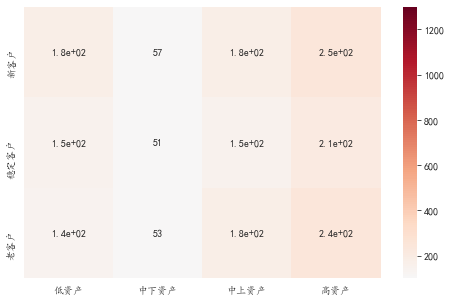

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(res34, vmin=100, vmax=1300, annot=True, center=100, cmap='RdBu_r')
savefig()

In [20]:
res34.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 新客户 to 老客户
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   低资产     3 non-null      float64
 1   中下资产    3 non-null      float64
 2   中上资产    3 non-null      float64
 3   高资产     3 non-null      float64
dtypes: float64(4)
memory usage: 228.0+ bytes
